In [70]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams["savefig.dpi"] = 300

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.utils import shuffle

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)
lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [72]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [73]:
confusion_matrix(y_test, y_pred)

array([[50,  3],
       [ 3, 87]])

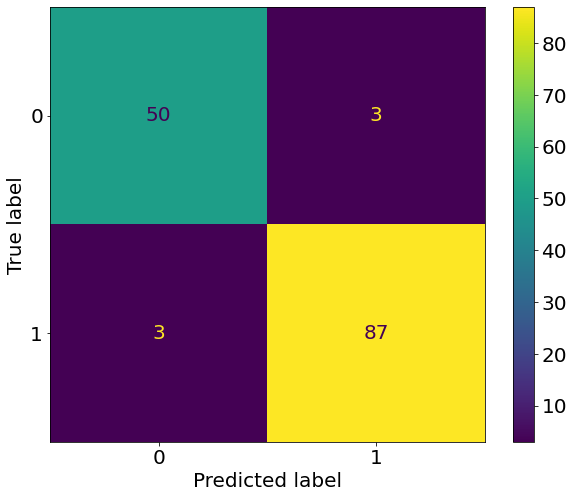

In [74]:
plot_confusion_matrix(lr, X_test, y_test)
plt.savefig("images/confusion_matrix_normal.png", transparent=True)

In [75]:
y_true = np.zeros(100, dtype=int)
y_true[:10] = 1
y_pred_1 = np.zeros(100, dtype=int)
y_pred_2 = y_true.copy()
y_pred_2[10:20] = 1
y_pred_3 = y_true.copy()
y_pred_3[5:15] = 1 - y_pred_3[5:15]

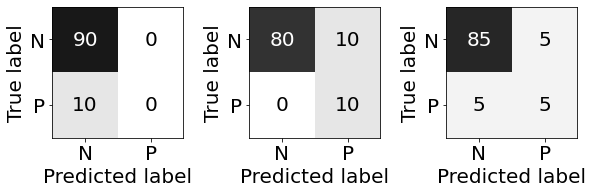

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.colors import Normalize

fig, axes = plt.subplots(1, 3)
for i, (ax, y_pred) in enumerate(zip(axes, [y_pred_1, y_pred_2, y_pred_3])):
    ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=['N', 'P']).plot(ax=ax, cmap='gray_r')
    ax.images[-1].colorbar.remove()
    ax.images[0].set_norm(Normalize(vmin=0, vmax=100))
plt.savefig("images/confusion_matrix_90_neg.png", transparent=True,)

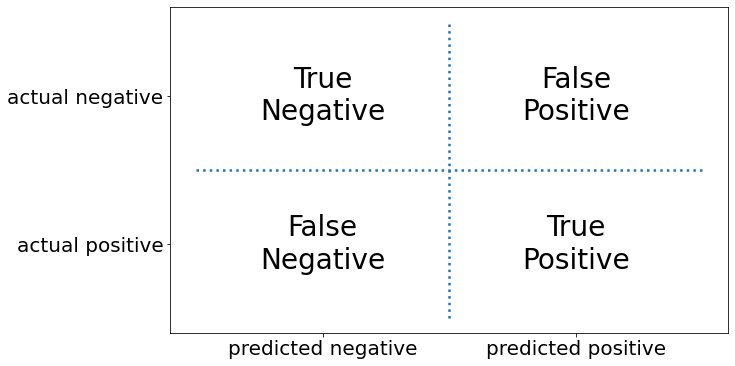

In [90]:
def make_2x2_matrix(labels, fontsize=24):
    plt.figure(figsize=(10, 6))
    plt.vlines([.5], ymin=-.5, ymax=1.5, linestyle=':')
    plt.hlines([.5], xmin=-.5, xmax=1.5, linestyle=':')
    plt.xticks([0, 1], ['predicted negative', 'predicted positive'])
    plt.yticks([1, 0], ['actual negative', 'actual positive'])
    a = plt.text(0, 1, labels[0], horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
    b = plt.text(0, 0, labels[1], horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
    c = plt.text(1, 1, labels[2], horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
    d = plt.text(1, 0, labels[3], horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
    return a, b, c, d
make_2x2_matrix(['True\nNegative', 'False\nNegative', 'False\nPositive', 'True\nPositive'], fontsize=28)
plt.savefig("images/confusion_matrix.png")

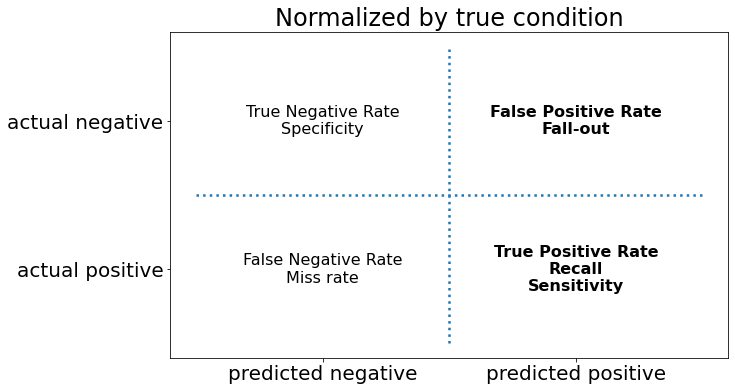

In [91]:
res = make_2x2_matrix(['True Negative Rate\nSpecificity', 'False Negative Rate\nMiss rate', 'False Positive Rate\nFall-out', 'True Positive Rate\nRecall\nSensitivity'],
               fontsize=16)
res[2].set_fontweight('bold')
res[3].set_fontweight('bold')
plt.title("Normalized by true condition")
plt.savefig("images/confusion_matrix_norm_true.png")

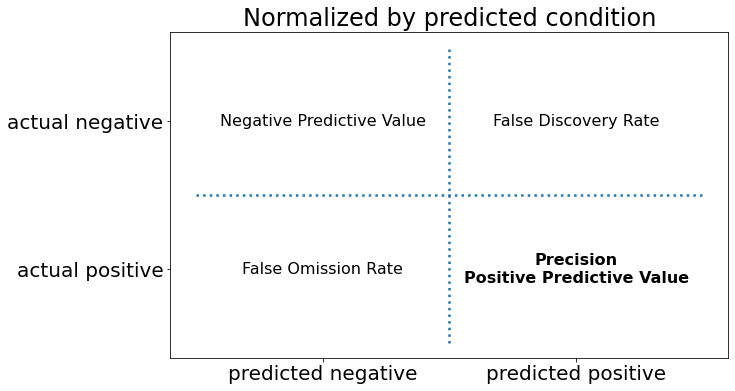

In [92]:
res = make_2x2_matrix(['Negative Predictive Value', 'False Omission Rate', 'False Discovery Rate', 'Precision\nPositive Predictive Value'],
               fontsize=16)
res[3].set_fontweight('bold')
plt.title("Normalized by predicted condition")
plt.savefig("images/confusion_matrix_norm_pred.png")

In [127]:
y_true = [1, 0, 0, 0, 0, 0, 0, 1]
y_pred = [1, 1, 1, 1, 0, 0, 1, 0]

In [128]:
from sklearn.metrics import recall_score

In [129]:
recall_score(y_true, y_pred, average='weighted')

0.375

In [134]:
6*(1/3) + 2/2)/8

0.375

In [130]:
recall_score(y_true, y_pred, average='macro')

0.41666666666666663

In [133]:
(1/2 + 1/3)/2

0.41666666666666663

In [131]:
recall_score(y_true, y_pred)

0.5

In [132]:
recall_score(y_true, y_pred, pos_label=0)

0.3333333333333333

In [135]:
from sklearn.metrics import classification_report

In [137]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.20      0.50      0.29         2

    accuracy                           0.38         8
   macro avg       0.43      0.42      0.37         8
weighted avg       0.55      0.38      0.40         8



In [138]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

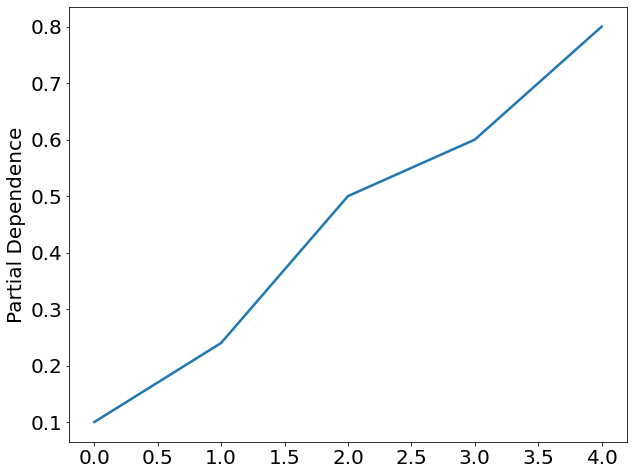

In [143]:
fig, ax = plt.subplots()
ax.plot([0, 1, 2, 3, 4], [0.1, 0.24, 0.5, 0.6, 0.8])
ax.set_ylabel("Partial Dependence")
fig.savefig("images/partial_dependence_example.png", transparent=True)